# 자연어 처리 
- 수집 
- 정제 및 토큰화
- 불용어 / 구두점 제거 
- 단어 사전 => 토큰: 숫자 맵핑 진행 
- 데이터의 수치화 

## [1] 모듈 로딩 및 데이터 준비
---

In [1]:
# 모듈 로딩 

from nltk.tokenize import word_tokenize, sent_tokenize, wordpunct_tokenize
# 영어 사용해서 nltk 사용 
# wordpunct_tokenize : 받을 때 부터 구두점 제거해서 사용 


In [2]:
# 데이터 준비 
TEXT_FILE = '../10_02/DATA/corpus_data.txt'

In [3]:
# 파일에서 데이터 추출 => 파일 읽기 default : 'rt'
with open(TEXT_FILE, mode='rt', encoding='utf-8') as f:
    # 읽을 데이터 사이즈 지정한 만큼 읽기
    text_data100 = f.read(100) # 100개 읽기 
    f.seek(0) # 원하는 위치로 이동시킴 
    text_data = f.read()

In [4]:
# 파일에서 데이터 추출 => 파일 읽기 default : 'rt'
with open(TEXT_FILE, mode='rt', encoding='utf-8') as f:
    # 읽을 데이터 사이즈 지정한 만큼 읽기
    text_data_all= f.read() 

In [5]:
len(text_data_all)

42053

In [6]:
len(text_data100), len(text_data)

(100, 42053)

총 42053개이지만 앞에서 100개를 먼저 읽어서 text_data의 길이는 그 이후부터 읽으므로 41953

In [7]:
# 파일에서 데이터 추출 => 파일 읽기 default : 'rt'
# 라인 단위로 읽기 => readline()

with open(TEXT_FILE, mode='rt', encoding='utf-8') as f:
    # 한 줄씩('\n') 읽기 -> 전체 읽으려면 반복문 돌려서 읽어야 함 
    text_data = f.readline() 

In [8]:
with open(TEXT_FILE, mode='rt', encoding='utf-8') as f:
    # 전체 읽으려면 반복문 돌려서 읽어야 함 - 파일의 끝을 몰라서 무한 반복문 필요

    all_data = [] # 읽은 문장 저장하기 위함 
    while True:
        # 한 줄씩('\n') 읽기
        text_data = f.readline()
        if not text_data: 
            break
        else:
            all_data.append(text_data)    

In [9]:
print(f'text_data => {len(text_data)}개, {text_data}')
print(f'all_data => {len(all_data)}개, {all_data}')

text_data => 0개, 
all_data => 149개, ['"The Tichborne Claimant" redirects here. For the 1998 film, see The Tichborne Claimant (film).\n', '\n', "The blended image (centre) was said by the Claimant's supporters to prove that Roger Tichborne (left, in 1853) and the Claimant (right, in 1874) were one and the same person.[n 1]\n", 'The Tichborne case was a legal cause célèbre that fascinated Victorian Britain in the 1860s and 1870s. It concerned the claims by a man sometimes referred to as Thomas Castro or as Arthur Orton, but usually termed "the Claimant", to be the missing heir to the Tichborne baronetcy. He failed to convince the courts, was convicted of perjury and served a 14-year prison sentence.\n', '\n', "Roger Tichborne, heir to the family's title and fortunes, was presumed to have died in a shipwreck in 1854 at age 25. His mother clung to a belief that he might have survived, and after hearing rumours that he had made his way to Australia, she advertised extensively in Australian 

In [10]:
# 파일에서 데이터 추출 => 파일 읽기 default : 'rt'
# 라인 단위로 읽기 => readlines()
with open(TEXT_FILE, mode='rt', encoding='utf-8') as f:
    
    # 한 줄씩('\n') 전체 읽어서 리스트에 담아서 반환 
    text_data = f.readlines()

In [11]:
print(f'text_data => {len(text_data)}개, {text_data}')

text_data => 149개, ['"The Tichborne Claimant" redirects here. For the 1998 film, see The Tichborne Claimant (film).\n', '\n', "The blended image (centre) was said by the Claimant's supporters to prove that Roger Tichborne (left, in 1853) and the Claimant (right, in 1874) were one and the same person.[n 1]\n", 'The Tichborne case was a legal cause célèbre that fascinated Victorian Britain in the 1860s and 1870s. It concerned the claims by a man sometimes referred to as Thomas Castro or as Arthur Orton, but usually termed "the Claimant", to be the missing heir to the Tichborne baronetcy. He failed to convince the courts, was convicted of perjury and served a 14-year prison sentence.\n', '\n', "Roger Tichborne, heir to the family's title and fortunes, was presumed to have died in a shipwreck in 1854 at age 25. His mother clung to a belief that he might have survived, and after hearing rumours that he had made his way to Australia, she advertised extensively in Australian newspapers, offer

## [2] 데이터 전처리
---

### [2-1] 줄바꿈 문자('\n') 처리

줄바꿈 문자를 제거한 후 그 길이가 0보다 크면 추가하고 0이면 줄바꿈 문자만 있었다는 의미로 제거

In [12]:
# ex) ['abcd\n', '\n', 'aaaaa       dfdf\n']
exam_data = ['abcd\n', '\n', 'aaaaa       dfdf\n']
exam_data[::-1] 

['aaaaa       dfdf\n', '\n', 'abcd\n']

In [13]:
all_text = []
for text in text_data:
    text = text.replace('\n', '')
    if len(text): all_text.append(text) 
print(f'all_text => {len(all_text)}개')

all_text => 87개


### [2-2] 대소문자 통일 

In [14]:
all_text = [text.lower() for text in all_text]
# 반복문 보다는 list comprehension이 메모리 입장에서 더 좋음 
all_text

['"the tichborne claimant" redirects here. for the 1998 film, see the tichborne claimant (film).',
 "the blended image (centre) was said by the claimant's supporters to prove that roger tichborne (left, in 1853) and the claimant (right, in 1874) were one and the same person.[n 1]",
 'the tichborne case was a legal cause célèbre that fascinated victorian britain in the 1860s and 1870s. it concerned the claims by a man sometimes referred to as thomas castro or as arthur orton, but usually termed "the claimant", to be the missing heir to the tichborne baronetcy. he failed to convince the courts, was convicted of perjury and served a 14-year prison sentence.',
 "roger tichborne, heir to the family's title and fortunes, was presumed to have died in a shipwreck in 1854 at age 25. his mother clung to a belief that he might have survived, and after hearing rumours that he had made his way to australia, she advertised extensively in australian newspapers, offering a reward for information. in 1

- (a for a in b) : Generator 생성

In [15]:
all_text = (text.lower() for text in all_text) 
# ()사용하면 generator로 동작 -> for문 사용해서 하나씩 출력 가능 
# 데이터가 많으면 사용 
all_text 

<generator object <genexpr> at 0x000002127F16A190>

In [16]:
# # generator 데이터 추출 시
# for _ in all_text:
#     print(_)

위의 코드를 막아야지 all_tokens에 데이터가 들어감 
- generator 프린트 하면
 
  1231413

  354362
    
  123513245 xxxx

  커서위치가  xx로 가버려서 뒤에 출력할게 사라짐 

  - 커서위치 돌리려면 f.seek(0) 사용해서 앞으로 돌려야 함

### [2-3] 토큰화

In [17]:
all_tokens = []
for text in all_text:
    all_tokens.append(wordpunct_tokenize(text))


In [18]:
print(f'all_tokens => {len(all_tokens)}')

all_tokens => 87


-> 불용어, 구두점 제거 필요

### [2-4] 불용어, 구두점 제거

In [19]:
# 불용어 추출 
from nltk.corpus import stopwords
import string

eng_stopwords = stopwords.words('english')
pun = list(string.punctuation)

In [20]:
for token in all_tokens:
    print(token)

['"', 'the', 'tichborne', 'claimant', '"', 'redirects', 'here', '.', 'for', 'the', '1998', 'film', ',', 'see', 'the', 'tichborne', 'claimant', '(', 'film', ').']
['the', 'blended', 'image', '(', 'centre', ')', 'was', 'said', 'by', 'the', 'claimant', "'", 's', 'supporters', 'to', 'prove', 'that', 'roger', 'tichborne', '(', 'left', ',', 'in', '1853', ')', 'and', 'the', 'claimant', '(', 'right', ',', 'in', '1874', ')', 'were', 'one', 'and', 'the', 'same', 'person', '.[', 'n', '1', ']']
['the', 'tichborne', 'case', 'was', 'a', 'legal', 'cause', 'célèbre', 'that', 'fascinated', 'victorian', 'britain', 'in', 'the', '1860s', 'and', '1870s', '.', 'it', 'concerned', 'the', 'claims', 'by', 'a', 'man', 'sometimes', 'referred', 'to', 'as', 'thomas', 'castro', 'or', 'as', 'arthur', 'orton', ',', 'but', 'usually', 'termed', '"', 'the', 'claimant', '",', 'to', 'be', 'the', 'missing', 'heir', 'to', 'the', 'tichborne', 'baronetcy', '.', 'he', 'failed', 'to', 'convince', 'the', 'courts', ',', 'was', 'co

In [21]:
for tokenList in all_tokens:
    print(tokenList)

['"', 'the', 'tichborne', 'claimant', '"', 'redirects', 'here', '.', 'for', 'the', '1998', 'film', ',', 'see', 'the', 'tichborne', 'claimant', '(', 'film', ').']
['the', 'blended', 'image', '(', 'centre', ')', 'was', 'said', 'by', 'the', 'claimant', "'", 's', 'supporters', 'to', 'prove', 'that', 'roger', 'tichborne', '(', 'left', ',', 'in', '1853', ')', 'and', 'the', 'claimant', '(', 'right', ',', 'in', '1874', ')', 'were', 'one', 'and', 'the', 'same', 'person', '.[', 'n', '1', ']']
['the', 'tichborne', 'case', 'was', 'a', 'legal', 'cause', 'célèbre', 'that', 'fascinated', 'victorian', 'britain', 'in', 'the', '1860s', 'and', '1870s', '.', 'it', 'concerned', 'the', 'claims', 'by', 'a', 'man', 'sometimes', 'referred', 'to', 'as', 'thomas', 'castro', 'or', 'as', 'arthur', 'orton', ',', 'but', 'usually', 'termed', '"', 'the', 'claimant', '",', 'to', 'be', 'the', 'missing', 'heir', 'to', 'the', 'tichborne', 'baronetcy', '.', 'he', 'failed', 'to', 'convince', 'the', 'courts', ',', 'was', 'co

In [22]:
# 불용어, 구두점, 길이 짧은 토큰 삭제 

# all_tokens : 리스트의 리스트이므로 for문 2번 사용해서 뺌
for tokenList in all_tokens:
    for token in tokenList[::-1]: # 구두점 제거를 위해서 뒤에서부터 가져옴 

        # 숫자면 제거 
        if token.isnumeric(): 
            tokenList.remove(token)

        # 불용어 또는 구두점이면 제거 
        elif (token in eng_stopwords) or (token in pun) or (len(token) <=2):
            tokenList.remove(token)

    
            

### [2-4] 단어별 빈도수 계산

In [23]:
data = {'a':1, 'b':2, 'c':'d'}
'a' in data

True

In [24]:
'd' in data 
# key만 보고 판단 

False

In [25]:
# 토큰을 키로 해서 빈도수 저장 

token_freqs = {}

# 라인(줄) 별 토큰을 읽어서 빈도 체크
for tokenList in all_tokens: 
    for token in tokenList:
        # 토큰 키가 존재하지 않으면 키로 추가 후 1로 설정 
        if token not in token_freqs:
            token_freqs[token] = 1 
            
        # 이미 존재하는 토큰 키이면 값을 1 증가 
        else: 
            token_freqs[token] += 1 

In [26]:
# 빈도별로 몇 개의 단어가 존재하는지 체크 
token_freqs.items()

dict_items([('tichborne', 97), ('claimant', 115), ('redirects', 1), ('film', 4), ('see', 1), ('blended', 1), ('image', 1), ('centre', 2), ('said', 5), ('supporters', 8), ('prove', 2), ('roger', 62), ('left', 6), ('right', 2), ('one', 13), ('person', 2), ('case', 23), ('legal', 12), ('cause', 3), ('célèbre', 1), ('fascinated', 1), ('victorian', 1), ('britain', 1), ('1860s', 1), ('1870s', 1), ('concerned', 2), ('claims', 2), ('man', 4), ('sometimes', 4), ('referred', 1), ('thomas', 8), ('castro', 15), ('arthur', 22), ('orton', 41), ('usually', 1), ('termed', 1), ('missing', 5), ('heir', 4), ('baronetcy', 4), ('failed', 5), ('convince', 3), ('courts', 4), ('convicted', 3), ('perjury', 5), ('served', 3), ('year', 5), ('prison', 3), ('sentence', 4), ('family', 32), ('title', 3), ('fortunes', 2), ('presumed', 3), ('died', 9), ('shipwreck', 2), ('age', 2), ('mother', 6), ('clung', 1), ('belief', 3), ('might', 6), ('survived', 1), ('hearing', 3), ('rumours', 2), ('made', 7), ('way', 1), ('aust

In [27]:
{v:k for k,v in token_freqs.items()}

# key가 중복되면 마지막 원소 담음 

{97: 'tichborne',
 115: 'claimant',
 1: 'accorded',
 4: 'cresswell',
 2: 'mystery',
 5: 'woodruff',
 8: 'hawkins',
 62: 'roger',
 6: 'interest',
 13: 'would',
 23: 'sir',
 12: 'evidence',
 3: 'maintained',
 15: 'castro',
 22: 'kenealy',
 41: 'orton',
 32: 'family',
 9: 'including',
 7: 'onslow',
 11: 'witnesses',
 14: 'name',
 10: 'cockburn',
 19: 'lady',
 18: 'years',
 16: 'trial'}

In [28]:
# 빈도수별로 단어 또는 단어 개수 저장 

freqsDict = {}
freqsDict_cnt = {}
for k,v in token_freqs.items():
    if v not in freqsDict:
        freqsDict[v] = [k] # 단어 종류
        freqsDict_cnt[v] = 1 # 개수 
    else:
        freqsDict[v].append(k)
        freqsDict_cnt[v] += 1


In [29]:
print(freqsDict)

{97: ['tichborne'], 115: ['claimant'], 1: ['redirects', 'see', 'blended', 'image', 'célèbre', 'fascinated', 'victorian', 'britain', '1860s', '1870s', 'referred', 'usually', 'termed', 'clung', 'survived', 'way', 'advertised', 'extensively', 'forward', 'claiming', 'manners', 'unrefined', 'gathered', 'instantly', 'dismissive', 'protracted', 'emerged', 'suggesting', 'charged', 'gain', 'passing', 'condemned', 'instigated', 'reform', 'championed', 'elected', 'independent', 'effective', 'parliamentarian', 'decline', 'dealings', 'recant', 'poverty', 'view', 'analysts', 'believe', 'element', 'conceivably', 'norman', 'conquest', 'reformation', '16th', 'century', 'number', 'hanged', 'drawn', 'quartered', 'complicity', 'babington', 'plot', 'assassinate', 'elizabeth', 'loyal', 'benjamin', 'services', 'king', 'tree', 'simplified', 'extinct', '14th', 'seventh', 'travelling', 'verdun', 'peace', 'amiens', 'broke', 'reigniting', 'napoleonic', 'wars', 'enemy', 'citizen', 'detained', 'held', 'shared', 'fo

In [30]:
print(freqsDict_cnt)

{97: 1, 115: 1, 1: 1054, 4: 80, 2: 283, 5: 43, 8: 12, 62: 1, 6: 16, 13: 6, 23: 2, 12: 2, 3: 113, 15: 1, 22: 2, 41: 1, 32: 1, 9: 4, 7: 19, 11: 8, 14: 3, 10: 5, 19: 1, 18: 3, 16: 1}


In [31]:
# 빈도수별로 단어, 단어 개수 한 번에 저장 

freqsDict = {}

for k,v in token_freqs.items():
    if v not in freqsDict:
        freqsDict[v] = [1,[k]]
    else:
        freqsDict[v][1].append(k)
        freqsDict[v][0] += 1

print(freqsDict)

{97: [1, ['tichborne']], 115: [1, ['claimant']], 1: [1054, ['redirects', 'see', 'blended', 'image', 'célèbre', 'fascinated', 'victorian', 'britain', '1860s', '1870s', 'referred', 'usually', 'termed', 'clung', 'survived', 'way', 'advertised', 'extensively', 'forward', 'claiming', 'manners', 'unrefined', 'gathered', 'instantly', 'dismissive', 'protracted', 'emerged', 'suggesting', 'charged', 'gain', 'passing', 'condemned', 'instigated', 'reform', 'championed', 'elected', 'independent', 'effective', 'parliamentarian', 'decline', 'dealings', 'recant', 'poverty', 'view', 'analysts', 'believe', 'element', 'conceivably', 'norman', 'conquest', 'reformation', '16th', 'century', 'number', 'hanged', 'drawn', 'quartered', 'complicity', 'babington', 'plot', 'assassinate', 'elizabeth', 'loyal', 'benjamin', 'services', 'king', 'tree', 'simplified', 'extinct', '14th', 'seventh', 'travelling', 'verdun', 'peace', 'amiens', 'broke', 'reigniting', 'napoleonic', 'wars', 'enemy', 'citizen', 'detained', 'hel

In [32]:
sorted(freqsDict.items(), reverse=True)

# (115, [1, ['claimant']) : 115번 나온 단어가 claimant 1개 존재 

[(115, [1, ['claimant']]),
 (97, [1, ['tichborne']]),
 (62, [1, ['roger']]),
 (41, [1, ['orton']]),
 (32, [1, ['family']]),
 (23, [2, ['case', 'sir']]),
 (22, [2, ['arthur', 'kenealy']]),
 (19, [1, ['lady']]),
 (18, [3, ['son', 'court', 'years']]),
 (16, [1, ['trial']]),
 (15, [1, ['castro']]),
 (14, [3, ['wagga', 'although', 'name']]),
 (13, [6, ['one', 'australia', 'england', 'may', 'doughty', 'would']]),
 (12, [2, ['legal', 'evidence']]),
 (11,
  [8,
   ['information',
    'london',
    'edward',
    'james',
    'henry',
    'former',
    '".[',
    'witnesses']]),
 (10, [5, ['support', 'accepted', 'civil', 'bogle', 'cockburn']]),
 (9, [4, ['died', 'john', 'ship', 'including']]),
 (8,
  [12,
   ['supporters',
    'thomas',
    'details',
    'wapping',
    'identity',
    'became',
    'later',
    'two',
    'first',
    'could',
    'ballantine',
    'hawkins']]),
 (7,
  [19,
   ['made',
    'butcher',
    'park',
    'remained',
    'daughter',
    'much',
    'katherine',
    '

## [3] 단어 집합/ 단어 사전 생성 
- 단어:숫자 맵핑 
- 나의 데이터셋을 숫자로 변환하기 위한 인코딩(Encoding) 표
- 문장 => 수치화 진행 시 길이를 동일하게 맞추는 작업 즉, 패딩 
    - 패딩에 사용되는 토큰 'PAD'키, 값은 0 
- 테스트 또는 검증에 입력되는 텍스트 ==> 단어사전/집합에 존재하지 않는 단어 
    - 존재하지 않는 토큰 'OOV' 또는 'UNK' 키, 값 1 

In [33]:
# 빈도가 높게 나오는 순서대로 단어 정렬 

sorted_tokens = sorted(token_freqs.items(), key=lambda x:x[1], reverse=True)
# (k,v)순서대로 저장되므로 1번 원소는 value

In [34]:
# 단어 사전 생성 및 초기화 
# 특수 토큰 : 'PAD', 'OOV' 또는 'UNK' 

PAD_TOKEN , OOV_TOKEN = 'PAD','OOV'
vocab = {'PAD_TOKEN':0, 'OOV_TOKEN':1}

In [35]:
# 데이터 코퍼스에서 추출된 토큰(단어)들 
for idx, tk in enumerate(sorted_tokens,2) : # 2부터 ㅅ시작 
    vocab[tk[0]] = idx

print(vocab) 

{'PAD_TOKEN': 0, 'OOV_TOKEN': 1, 'claimant': 2, 'tichborne': 3, 'roger': 4, 'orton': 5, 'family': 6, 'case': 7, 'sir': 8, 'arthur': 9, 'kenealy': 10, 'lady': 11, 'son': 12, 'court': 13, 'years': 14, 'trial': 15, 'castro': 16, 'wagga': 17, 'although': 18, 'name': 19, 'one': 20, 'australia': 21, 'england': 22, 'may': 23, 'doughty': 24, 'would': 25, 'legal': 26, 'evidence': 27, 'information': 28, 'london': 29, 'edward': 30, 'james': 31, 'henry': 32, 'former': 33, '".[': 34, 'witnesses': 35, 'support': 36, 'accepted': 37, 'civil': 38, 'bogle': 39, 'cockburn': 40, 'died': 41, 'john': 42, 'ship': 43, 'including': 44, 'supporters': 45, 'thomas': 46, 'details': 47, 'wapping': 48, 'identity': 49, 'became': 50, 'later': 51, 'two': 52, 'first': 53, 'could': 54, 'ballantine': 55, 'hawkins': 56, 'made': 57, 'butcher': 58, 'park': 59, 'remained': 60, 'daughter': 61, 'much': 62, 'katherine': 63, 'june': 64, 'april': 65, 'bella': 66, 'lost': 67, 'sydney': 68, 'william': 69, 'examination': 70, 'found':

In [36]:
# 텍스트 문장 ==> 수치화 [인코딩]
encoding_data = []
for tokenList in all_tokens:
    # 1개 문장 인코딩
    sent = []
    print(f'문장 : {tokenList}')
    for token in tokenList:
        sent.append(vocab[token])

    # 인코딩 된 문장 저장 
    encoding_data.append(sent)
    print(f'==> 인코딩 : {sent}\n')
    

문장 : ['tichborne', 'claimant', 'redirects', 'film', 'see', 'tichborne', 'claimant', 'film']
==> 인코딩 : [3, 2, 611, 135, 612, 3, 2, 135]

문장 : ['blended', 'image', 'centre', 'said', 'claimant', 'supporters', 'prove', 'roger', 'tichborne', 'left', 'claimant', 'right', 'one', 'person']
==> 인코딩 : [613, 614, 328, 92, 2, 45, 329, 4, 3, 76, 2, 330, 20, 331]

문장 : ['tichborne', 'case', 'legal', 'cause', 'célèbre', 'fascinated', 'victorian', 'britain', '1860s', '1870s', 'concerned', 'claims', 'man', 'sometimes', 'referred', 'thomas', 'castro', 'arthur', 'orton', 'usually', 'termed', 'claimant', 'missing', 'heir', 'tichborne', 'baronetcy', 'failed', 'convince', 'courts', 'convicted', 'perjury', 'served', 'year', 'prison', 'sentence']
==> 인코딩 : [3, 7, 26, 215, 615, 616, 617, 618, 619, 620, 332, 333, 136, 137, 621, 46, 16, 9, 5, 622, 623, 2, 93, 138, 3, 139, 94, 216, 140, 217, 95, 218, 96, 219, 141]

문장 : ['roger', 'tichborne', 'heir', 'family', 'title', 'fortunes', 'presumed', 'died', 'shipwreck',

## [4] 패딩(Padding)
- 길이가 다른 문장들의 길이를 일치시키기 
    - 가장 긴 문장 기준을오 나머지 문장들은 PAD 토큰으로 채우기 
    - 개발자 지정 길이를 기준으로 문장들의 길이를 조절 
        - 지정 길이보다 긴 경우 : 자르기 (앞부분/뒷부분 중 선택)
        - 지정 길이보다 짧은 경우 : PAD 토큰으로 채우기 
        

In [38]:
data_len = [len(sent) for sent in encoding_data]
print(data_len)

[8, 14, 35, 58, 59, 56, 3, 3, 42, 10, 85, 48, 61, 67, 2, 8, 95, 7, 67, 78, 2, 1, 7, 56, 59, 62, 112, 2, 6, 65, 62, 2, 2, 8, 112, 134, 117, 2, 3, 6, 76, 2, 36, 67, 62, 4, 5, 50, 3, 7, 99, 54, 101, 2, 92, 2, 9, 75, 68, 43, 4, 2, 14, 59, 108, 1, 6, 78, 89, 28, 69, 3, 82, 64, 1, 2, 7, 143, 4, 5, 50, 81, 1, 61, 62, 93, 78]


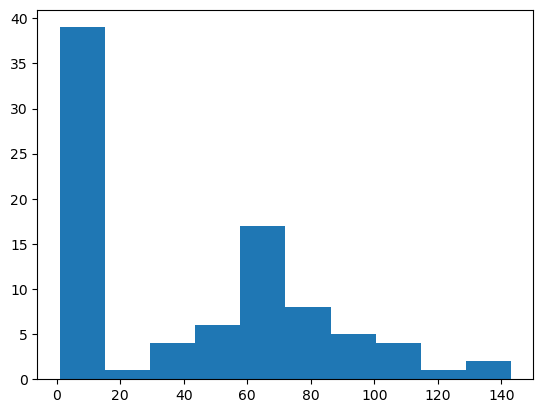

In [40]:
import matplotlib.pyplot as plt 

plt.hist(data_len)
plt.show()

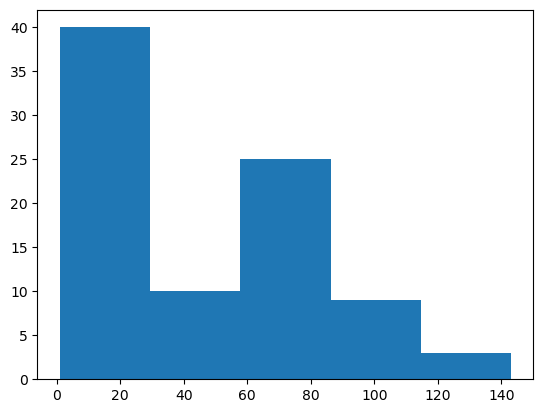

In [42]:
plt.hist(data_len, bins=5)
plt.show()

### [4-1] 가장 긴 문장 길이 기준 

In [43]:
# 기준 길이 
MAX_LENGTH = max(data_len)

MAX_LENGTH

143

In [45]:
# [1] 가장 긴 문장 길이 기준 
for sent in encoding_data:
    cur_length = len(sent)
    if cur_length < MAX_LENGTH:
        print(cur_length, MAX_LENGTH-cur_length)
        sent = sent + ([0]*(MAX_LENGTH-cur_length))

    break


8 135


In [46]:
print([0] * 135)
a = [1,2,3]
print(a+([0]*135))

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[1, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [48]:
# [1] 가장 긴 문장 길이 기준 
for idx, sent in enumerate(encoding_data):
    cur_length = len(sent)
    if cur_length < MAX_LENGTH:
        print(cur_length, MAX_LENGTH-cur_length)
        encoding_data[idx] = sent + ([0]*(MAX_LENGTH-cur_length))


14 129
35 108
58 85
59 84
56 87
3 140
3 140
42 101
10 133
85 58
48 95
61 82
67 76
2 141
8 135
95 48
7 136
67 76
78 65
2 141
1 142
7 136
56 87
59 84
62 81
112 31
2 141
6 137
65 78
62 81
2 141
2 141
8 135
112 31
134 9
117 26
2 141
3 140
6 137
76 67
2 141
36 107
67 76
62 81
4 139
5 138
50 93
3 140
7 136
99 44
54 89
101 42
2 141
92 51
2 141
9 134
75 68
68 75
43 100
4 139
2 141
14 129
59 84
108 35
1 142
6 137
78 65
89 54
28 115
69 74
3 140
82 61
64 79
1 142
2 141
7 136
4 139
5 138
50 93
81 62
1 142
61 82
62 81
93 50
78 65


In [49]:
for _ in encoding_data[:3]:
    print(len(_), _)

143 [3, 2, 611, 135, 612, 3, 2, 135, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
143 [613, 614, 328, 92, 2, 45, 329, 4, 3, 76, 2, 330, 20, 331, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
143 [3, 7, 26, 215, 615, 616, 617, 618, 619, 620, 332, 333, 136, 137, 621, 46, 16, 9, 5, 622, 623, 2, 93, 13

In [50]:
# 기준 길이 
MAX_LENGTH = 100
MAX_LENGTH

100

In [51]:
# [2] 가장 긴 문장 길이 기준 
for idx, sent in enumerate(encoding_data):
    cur_length = len(sent)
    if cur_length < MAX_LENGTH:
        print(cur_length, MAX_LENGTH-cur_length)
        encoding_data[idx] = sent + ([0]*(MAX_LENGTH-cur_length))
    else:
        # 앞부분 제거 
        encoding_data[idx] = sent[(cur_length - MAX_LENGTH) :] 
        # # 뒷부분 제거 
        # encoding_data[idx] = sent[:MAX_LENGTH]


In [52]:
print(encoding_data[0])

[3, 2, 611, 135, 612, 3, 2, 135, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [53]:
a = [1,2,3,4,5,6,7,8,9,0]
a[:-6]

[1, 2, 3, 4]

In [59]:
MAX_LEN = 5

a = [1,2,3,4,5,6,7,8]
# a=[1,2,3,4,5] 
print(a[:MAX_LEN]) # 뒤를 자름 

# a=[6,7,8,9,0]
print(a[len(a)-MAX_LEN:]) # 앞을 자름 

[1, 2, 3, 4, 5]
[4, 5, 6, 7, 8]
